In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [7]:
x_train.shape

(60000, 28, 28)

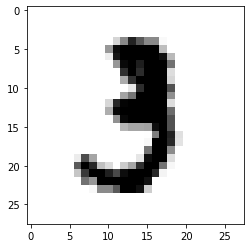

In [12]:
plt.imshow(x_train[10], cmap='gray_r')

In [13]:
y_train.shape
#we need to one hot encode. If not algo might think they are continous variable and it's a regression issue

(60000,)

In [15]:
from keras.utils.np_utils import to_categorical
y_cat_test = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train, 10)
                        

In [19]:
y_cat_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
x_train[10].max()
# we need to normalize so that it's between 0 and 1
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [22]:
x_train[10].max()

0.996078431372549

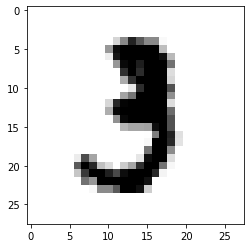

In [23]:
plt.imshow(x_train[10], cmap='gray_r')

In [25]:
x_train.shape
#reshape it to include color images

(60000, 28, 28)

In [26]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [28]:
x_train.shape

(60000, 28, 28, 1)

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [30]:
model = Sequential()

#convolution layer 
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

#Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#Dense layer. we flatten it out so that the Dense layer can understand. It doesn't understand 2-D layer. so, we flatten it to 1-D
model.add(Flatten())


#Dense
model.add(Dense(128,activation='relu'))


#Output
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(x_train,y_cat_train,epochs=4)

Epoch 1/4
60000/60000 [==============================] - 5s 76us/step - loss: 0.0346 - accuracy: 0.9898
Epoch 2/4
60000/60000 [==============================] - 5s 76us/step - loss: 0.0273 - accuracy: 0.9922
Epoch 3/4
60000/60000 [==============================] - 5s 76us/step - loss: 0.0215 - accuracy: 0.9939
Epoch 4/4
60000/60000 [==============================] - 5s 75us/step - loss: 0.0170 - accuracy: 0.9955


In [34]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 1s 50us/step


[0.07522025665081573, 0.984499990940094]

In [35]:
model.save('mnist.h5')

In [36]:
from sklearn.metrics import classification_report
predictions = model.predict_classes(x_test)

In [37]:
print(classification_report(y_test, predictions))
#predictions are not one hot encoded

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## CIFAR-10

In [5]:
from keras.datasets import cifar10

In [7]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

In [8]:
x_train.shape

(50000, 32, 32, 3)

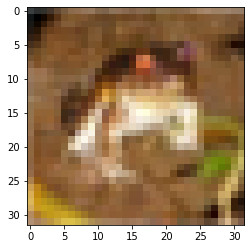

In [9]:
plt.imshow(x_train[0])

In [10]:
x_train.max()

255

In [11]:
x_train = x_train / 255
x_test = x_test / 255

In [17]:
y_train.min(), y_train.max()

(0, 9)

In [18]:
from keras.utils.np_utils import to_categorical
y_cat_test = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train, 10)
                        

In [40]:
cifar = Sequential()
cifar.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
cifar.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
cifar.add(MaxPool2D(pool_size=(2,2)))

cifar.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
cifar.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
cifar.add(MaxPool2D(pool_size=(2,2)))

cifar.add(Flatten())

#usually it's in 2^.
cifar.add(Dense(512, activation='relu'))

#output
cifar.add(Dense(10,activation='softmax'))

cifar.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [41]:
cifar.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 29, 29, 32)        1568      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 26, 26, 32)        16416     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 64)        32832     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 64)          65600     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)              

In [43]:
cifar.fit(x_train, y_cat_train,verbose=2,epochs=30)

Epoch 1/30
 - 6s - loss: 0.8045 - accuracy: 0.7417
Epoch 2/30
 - 6s - loss: 0.8073 - accuracy: 0.7409
Epoch 3/30
 - 6s - loss: 0.8058 - accuracy: 0.7423
Epoch 4/30
 - 6s - loss: 0.8042 - accuracy: 0.7446
Epoch 5/30
 - 7s - loss: 0.7939 - accuracy: 0.7457
Epoch 6/30
 - 7s - loss: 0.7914 - accuracy: 0.7461
Epoch 7/30
 - 6s - loss: 0.7833 - accuracy: 0.7516
Epoch 8/30
 - 6s - loss: 0.7810 - accuracy: 0.7513
Epoch 9/30
 - 6s - loss: 0.7836 - accuracy: 0.7507
Epoch 10/30
 - 6s - loss: 0.7939 - accuracy: 0.7512
Epoch 11/30
 - 6s - loss: 0.7861 - accuracy: 0.7508
Epoch 12/30
 - 6s - loss: 0.7877 - accuracy: 0.7530
Epoch 13/30
 - 6s - loss: 0.8042 - accuracy: 0.7482
Epoch 14/30
 - 6s - loss: 0.7983 - accuracy: 0.7486
Epoch 15/30
 - 6s - loss: 0.7879 - accuracy: 0.7534
Epoch 16/30
 - 6s - loss: 0.8095 - accuracy: 0.7524
Epoch 17/30
 - 6s - loss: 0.7883 - accuracy: 0.7539
Epoch 18/30
 - 6s - loss: 0.7961 - accuracy: 0.7514
Epoch 19/30
 - 6s - loss: 0.8191 - accuracy: 0.7457
Epoch 20/30
 - 6s - l

In [45]:
cifar.evaluate(x_test,y_cat_test)


10000/10000 [==============================] - 1s 68us/step


[2.8852761674880982, 0.6650999784469604]

In [46]:
cifar.save('cifar.h5')

In [47]:
from sklearn.metrics import classification_report
predictions = cifar.predict_classes(x_test)

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.54      0.81      0.65      1000
           1       0.78      0.85      0.81      1000
           2       0.47      0.71      0.57      1000
           3       0.67      0.32      0.44      1000
           4       0.65      0.61      0.63      1000
           5       0.67      0.57      0.62      1000
           6       0.62      0.82      0.71      1000
           7       0.82      0.67      0.74      1000
           8       0.79      0.71      0.75      1000
           9       0.92      0.58      0.71      1000

    accuracy                           0.67     10000
   macro avg       0.70      0.67      0.66     10000
weighted avg       0.70      0.67      0.66     10000



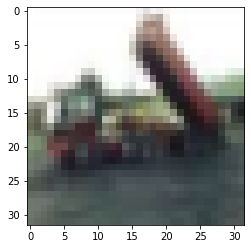

In [36]:
plt.imshow(x_train[2])